# Запуск и анализ результов A/B-теста в крупной интернет-компании

Требуется приоритизировать гипотезы из списка, запустить A/B-тест и проанализировать результаты.

У нас есть 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Описать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

После проведения A/B-тест получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача
Проанализирировать A/B-тест. Для этого:
- Построим график кумулятивной выручки по группам. 
- Построим график кумулятивного среднего чека по группам. 
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построим график кумулятивной конверсии по группам. 
- Построим график относительного изменения кумулятивной конверсии группы B к группе A. 
- Построим точечный график количества заказов по пользователям. 
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов. 
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Описание данных

Данные для первой части<br>
Файл /datasets/hypothesis.csv:<br>

Hypothesis — краткое описание гипотезы;<br>
Reach — охват пользователей по 10-балльной шкале;<br>
Impact — влияние на пользователей по 10-балльной шкале;<br>
Confidence — уверенность в гипотезе по 10-балльной шкале;<br>
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>

Данные для второй части<br>
Файл /datasets/orders.csv:<br>

transactionId — идентификатор заказа;<br>
visitorId — идентификатор пользователя, совершившего заказ;<br>
date — дата, когда был совершён заказ;<br>
revenue — выручка заказа;<br>
group — группа A/B-теста, в которую попал заказ.<br>

Файл /datasets/visitors.csv:<br>

date — дата;<br>
group — группа A/B-теста;<br>
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [1]:
#библиотеки
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
try:
    hypothesis, orders, visitors = (pd.read_csv('hypothesis.csv'),
         pd.read_csv('orders.csv'),
         pd.read_csv('visitors.csv'))
except:
    hypothesis, orders, visitors = (pd.read_csv('/datasets/hypothesis.csv'),
         pd.read_csv('/datasets/orders.csv'),
         pd.read_csv('/datasets/visitors.csv'))
    


##  Выбор гипотезы

In [3]:
# проверим тип данных
hypothesis.info()
pd.options.display.max_colwidth = 100
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#посчитаем ICE
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [5]:
# посчитаем RICE
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


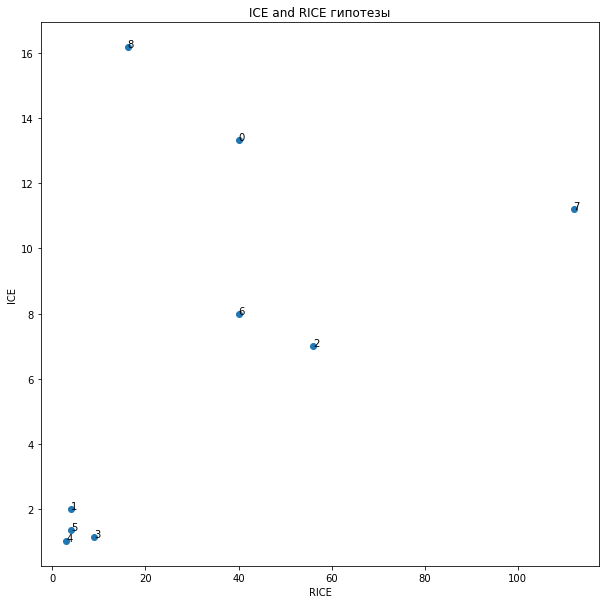

In [6]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
    
fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()  

### Вывод

Наиболее перспективные гипотезы по ICE: 8, 0 и 7.
Наиболее перспективные гипотезы по RICE: 7, 2, 0 и 6.
Как видим лидеры сменились, и все это произошло, потому что у гипотезы 8 очень низкий параметр RICH, всего 1. В то время как у гипотезы 7 этот параметр имеем макимальное значение 10. Так же и гипотеза 2 поднялась с 5 места на второе, из-за высокого значения параметр RICH = 8. 

Получается гипотезы 7 и 2 заденут наибольшее количество пользователей.

##  Анализ А/В-теста

In [7]:
# проверим тип данных
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
# проверим тип данных
visitors.info()
visitors.sort_values(['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,619
32,2019-08-02,B,581
2,2019-08-03,A,507
...,...,...,...
28,2019-08-29,A,577
60,2019-08-30,B,490
29,2019-08-30,A,490
30,2019-08-31,A,699


In [9]:
# преобразуем даты

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

Проверила на дубликаты и их не обнаружила

In [12]:
orders.groupby('group').agg({'visitorId':'count'})

,visitorId
group,
A,557
B,640


In [13]:
print('Начало теста', orders['date'].min())
print('Конец теста', orders['date'].max())

Начало теста 2019-08-01 00:00:00
Конец теста 2019-08-31 00:00:00


В нашем тесте участвуют две группы: А и В. Период теста: август 2019 года

### График кумулятивной выручки по группам

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(10).sort_values(['date'])

,date,group
55,2019-08-01,A
66,2019-08-01,B
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
124,2019-08-17,A
125,2019-08-17,B
85,2019-08-22,B
86,2019-08-22,A


In [15]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

In [16]:
cumulativeData

,date,group,orders,revenue,visitors
0,2019-08-01,A,24,148579,719
1,2019-08-01,B,21,101217,713
2,2019-08-02,A,44,242401,1338
3,2019-08-02,B,45,266748,1294
4,2019-08-03,A,68,354874,1845
...,...,...,...,...,...
57,2019-08-29,B,596,5559398,17708
58,2019-08-30,A,545,4022970,18037
59,2019-08-30,B,620,5774631,18198
60,2019-08-31,A,557,4084803,18736


In [17]:
print('Начало теста', cumulativeData['date'].min())
print('Конец теста', cumulativeData['date'].max())

Начало теста 2019-08-01 00:00:00
Конец теста 2019-08-31 00:00:00


Период теста: август 2019 года. 

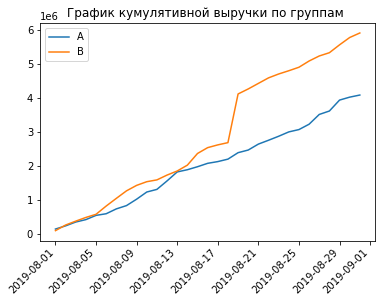

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.title ('График кумулятивной выручки по группам ')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45, ha='right')
plt.legend() 
plt.show()
#cumulativeRevenueA

По графику видно, что выручка сначала росла одинаково, потом у группу В она стала выше, потом группа А подтянулась. но группа В сделала качественный рывок и ушла вверх. Такой резкий скачок может быть либо из-за всплеска заказов, либо о появлении очень дорогиз заказов в выборке. К концу периода выручка группы В больше в полтора раза.

### График кумулятивного среднего чека по группам

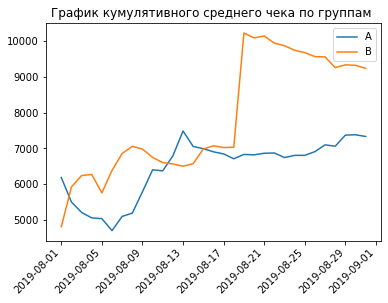

In [19]:
plt.title ('График кумулятивного среднего чека по группам ')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Средний чек у группы А тоже ниже среднего чека группы В. И опять видим скачок у группы В. А значит в выборку попали чеки с большой суммой. На конец периода средний чек группа В больше 1,28 раз, чем чек у группы А. 

### График относительного изменения кумулятивного среднего чека группы В к группе А

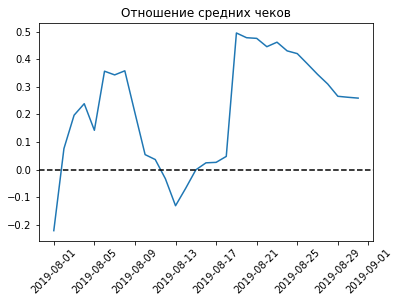

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.title('Отношение средних чеков')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.show()

#mergedCumulativeRevenue

На графике видны резкие изменения отношения средних чеков. Скорее всего в эти дни были больше чеки или выбросы. И видим, что под конец средний чек группы В стабильны выше чека группы А.

### График кумулятивной конверсии по группам

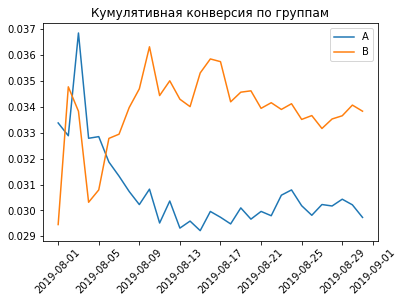

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.title('Кумулятивная конверсия по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()


В начале были колебания, но затем конверсия группы В ушла вперед. И стабильно держится выше конверсии группы А. 

### График относительного изменения кумулятивной конверсии группы В к группе А

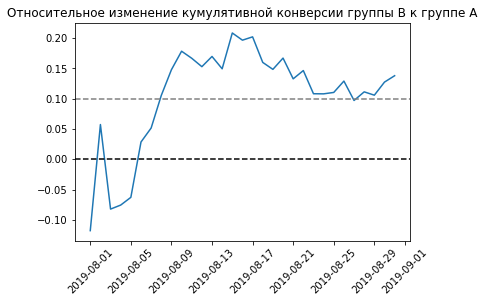

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)

plt.show()

В начале видим колебание конверсий, но затем конверсия группы В стала расти. И подконец она немного снизилась, но все равно выше коверсии группы А.

### График количества заказов по пользователям

In [23]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsers.sort_values('transactionId', ascending=False)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


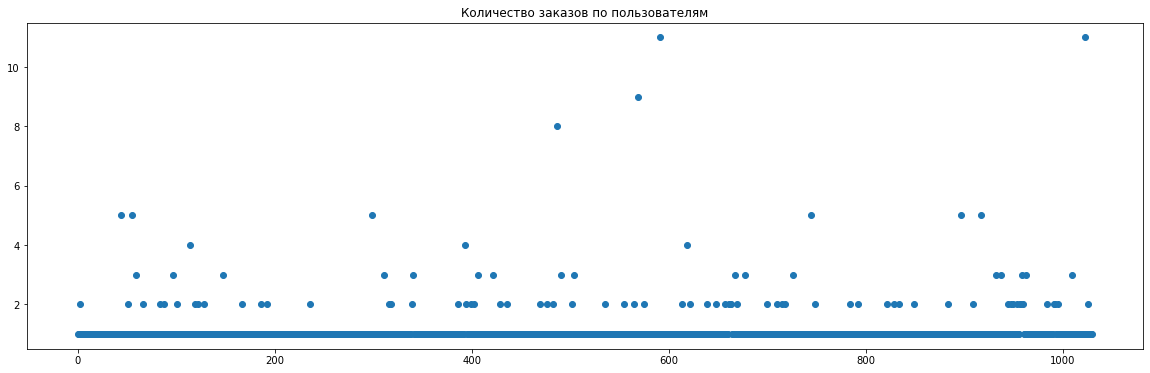

In [24]:
# строим график количества заказов

plt.figure(figsize=(20,6))
ordersByUsers['transactionId'].plot(style='o', title = 'Количество заказов по пользователям')
#plt.plot(y='кол-во заказов')

plt.show()

На графике видно, что очень много пользователей делают по одному заказу. Довольно много делают по 2 заказа. А вот 3 и более заказов делают не так много пользователей. Думаю это выбросы, от которых надо будет очистить данные. Отсеять всех пользователей с заказами больше 2.

### Перцентили количества заказов на пользователя

In [25]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

Посмотрев перцентили, определили, что 1% делает более 4 заказов, 5% более 2. Это подтверждает предположение сделанное по графику. Отсеем всех покупателей с покупками более 2 раз. 

### График стоимости заказов

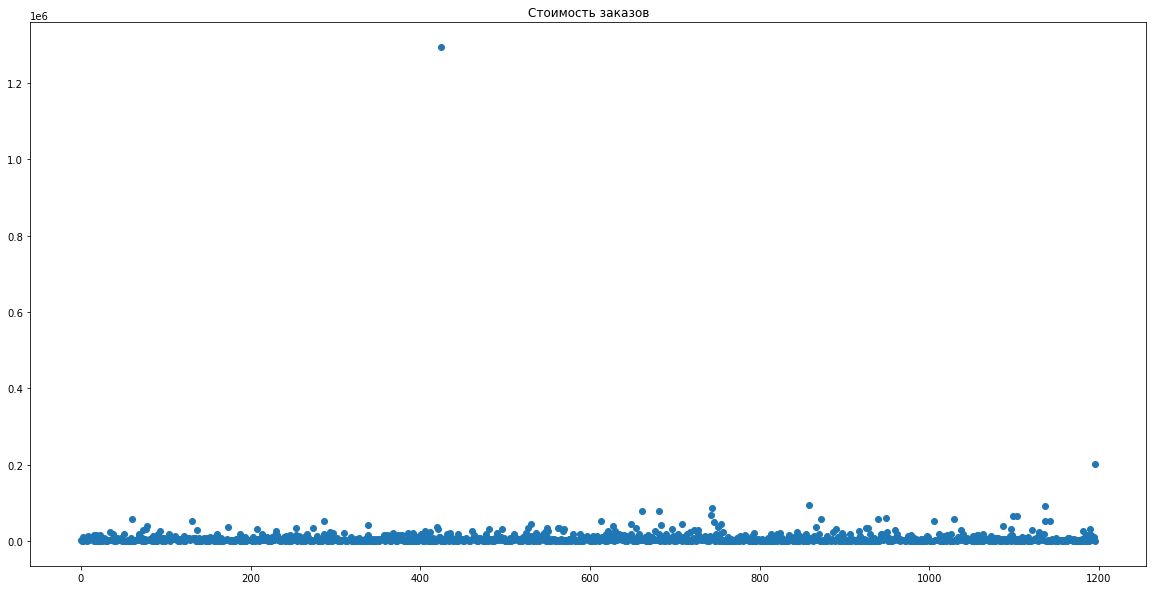

In [26]:
# построим график по стоимости заказов
plt.figure(figsize=(20,10))
orders['revenue'].plot(style='o', title = 'Стоимость заказов')
plt.show()

In [27]:
orders['revenue'].sort_values()

584          50
1091         50
756          50
459          50
1013         60
         ...   
744       86620
1136      92550
858       93940
1196     202740
425     1294500
Name: revenue, Length: 1197, dtype: int64

На графике видно, что есть заказ на очень большую сумму(1 294 500 руб). Из-за него на графике плохо видно какие выбросы еще есть. Надо очистить данные от этих выбросов.

### Перцентили стоимости заказов

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

1% делает заказов на сумму более 58233 и 5% на сумму более 28000. Можно откинуть все заказы более 28000.

In [29]:
# уберем заказы суммой более 28000
orders_clear = orders[orders['revenue']<=np.percentile(orders['revenue'], [95, 99])[0]]

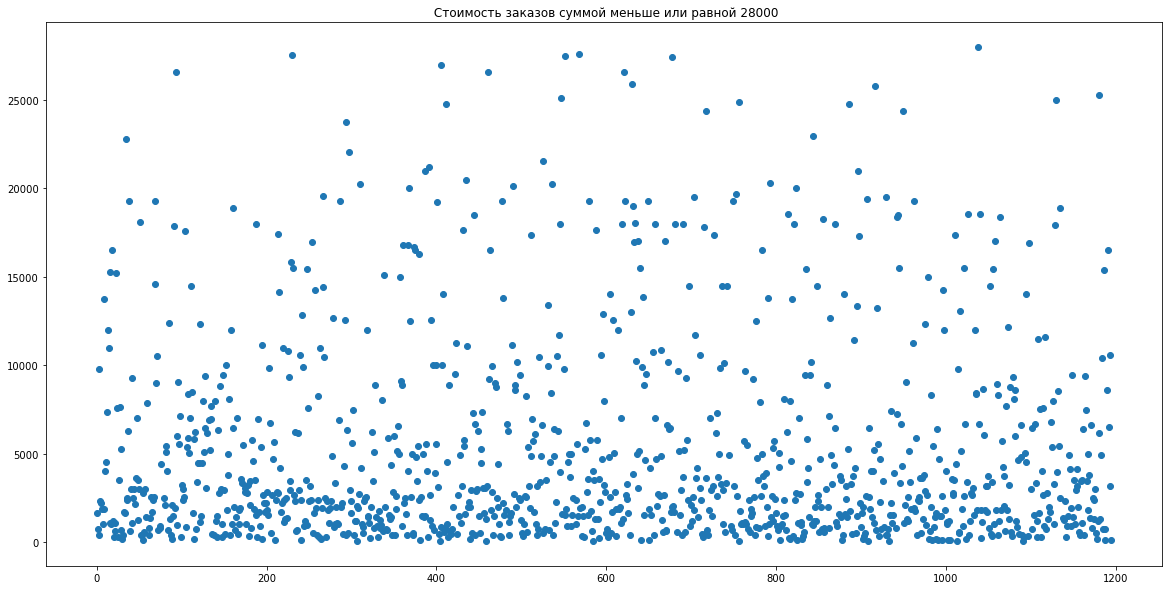

In [30]:
# посмотрим на очищенный график
plt.figure(figsize=(20,10))
orders_clear['revenue'].plot(style='o', title = ' Стоимость заказов суммой меньше или равной 28000')
plt.show()

### Статистическая значимость различий в конверсии

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [31]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

# собираем информацию о визитах по группам
visitorsADaily = cumulativeData[cumulativeData['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = cumulativeData[cumulativeData['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество 
#заказов. Тем, кто ничего не заказал, будут соответствовать нули.

sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['visitorId'])), name='visitorId')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['visitorId'])), name='visitorId')],axis=0)

print('P-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Конверсия группы В относительно конверсии группы А',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value 0.015
Конверсия группы В относительно конверсии группы А 0.144


Вывод: По «сырым» данным в конверсии групп A и B есть различия.

Первое число — p-value = 0.015 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 14.4% — второе число в выводе.


### Статистическая значимость различий в среднем чеке заказа

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [32]:
print('P-value','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие между средними чеками группы В относительно группы А','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
        

P-value 0.729
Различие между средними чеками группы В относительно группы А 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Cредний чек группы B больше среднего чека группы A на 25.9%. 

### Статистическая значимость различий в конверсии по "очищенным" данным

Очистим данные от аномальных. Отсеем всех пользователей, кто сделал более 2 заказов, и все заказы, стоимостью более 28тыс.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > np.percentile(ordersByUsers['transactionId'], [95, 99])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > np.percentile(ordersByUsers['transactionId'], [95, 99])[0]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей',abnormalUsers.shape[0])

Количество аномальных пользователей 74


Обнаружили 74 аномальных пользователя. Очистим данные и снова проведем тесты. Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['visitorId'])
            ),
            name='visitorId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['visitorId'])
            ),
            name='visitorId',
        ),
    ],
    axis=0,
) 

In [35]:
print('P-value','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Конверсия','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value 0.011
Конверсия 0.178


И снова тот же вывод: По «очищенным» данным в конверсии групп A и B есть различия.

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B стал еще больше 17.8% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа по "очищенным" данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами по "очищенным" данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [36]:
print(
    'P-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Различие между средними чеками группы В относительно группы А',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value 0.738
Различие между средними чеками группы В относительно группы А -0.020


P-value практически не изменился и остался значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. А вот средний чек группы B стал меньше среднего чека группы A на 2%. 

### Вывод

Какие выводы по тесту можем сделать?

Имеющиеся факты:

- Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B значительно лучше группы А;

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. По всем тестам и графикам группа В показывает себя лучше, чем группа А.